# 88-Inch Foil Activation Experiment to measure 33MeV Deutron Break-up on Ta neutron Spectrum

This notebook contains the code necessary to generate STAYSL inputs, a description on how to run STAYSL, and the anaysis and plotting of the resulting outputs.  

## BCF

The STASYL BCF input files are generated from the recoded beam current monitor files stores at:

In [1]:
from Support.Utilities import check_path

bcmPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/BCM/CleanBeam_Trimmed.bcm'
check_path(bcmPath)

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/BCM/CleanBeam_Trimmed.bcm


True

The file used is a modified version of the BCM created file where pre and post calibrations are removed from the file; only the actual irradiation measurements are included.

Support for generating the BCF input files can be found in the [PyScripts Repo](http://github.com/jamesbevins/PyScripts). 

In [2]:
from Unfolding.STAYSL import bcmToBCF

bcfPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/BCF/flux_history.dat'
bcmToBCF(bcmPath, bcfPath)

The total measurment time was 7866.0 seconds with an integrated measurement of 0.041859432.


The BCF file will be placed at the path indicated above.  The BCF code can be executed by double clicking on the BCF executable and typing in the BCF input file name.

## SHIELD

SHIELD requires a fine group cross section file.  For this, the [14468 group shield cross sections](https://github.com/SlaybaughLab/88_Data/tree/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SHIELD/shld_xsect.out) were used.

NOTE: SHIELD is only valid/necessary for non-threshold reactions.

The course group structure is specified in the [shldengrp.dat](https://github.com/SlaybaughLab/88_Data/tree/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SHIELD/shldengrp.dat) file, but this is not required with STAYSL PNNL v 1.2.0.

The [input file](https://github.com/SlaybaughLab/88_Data/tree/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SHIELD/shldinput.dat) was generated using as measured quantities found in the [foil dimensions spreadsheet](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/BeamOnlyData/BeamFoilDimensions.xlsx).

SHIELD is ran by double clicking the SHIELD executable located in the same directory as the input files.

## SigPhi Calculator

The [SigPhi Calculator](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SigPhi_Calculator/SigPhi_Calculator_1.2_CleanBeam.xlsm) was filled in with data from the [foil dimensions spreadsheet](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/BeamOnlyData/BeamFoilDimensions.xlsx), [BCF output](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/BCF/flux_history.out), and the [experimental analysis data](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/33MeV_ETA_Activation_Analysis.pdf).

** Note: the activities are in units of Bq/g and were adjusted as such from the calculated $A_0$ values **

## STAYSL_PNNL

The STAYSL_PNNL input file was created from the [SigPhi Calculator](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SigPhi_Calculator/SigPhi_Calculator_1.2_CleanBeam.xlsm) and [MCNP simulation results]().

Default values for covariance data using Gaussian formalism were used.

The [SHIELD library input file](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/sshldlib.dat) is an appropriately named copy of the [SHIELD ouput file](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SHIELD/shldinput.out).

The flux normalization factor (TNORM) for the MCNP flux was calculated using the [Beam Calcs spreadsheet](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/ETA_88_BeamCalcs.xlsx) and experimental data.

To get the flux and flux uncertainty data from the MCNP output into STAYSL format:

In [3]:
from GeneralNuclear.MCNP import read_tally
from Unfolding.STAYSL import stayslFlux

simPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Simulated/Activation/33MeVTa/BeamOnly/Model/33MeVTaBeamOnly_Foil.out'
check_path(simPath)

(tallyFrame,tallyTot, ucertTot) = read_tally(simPath, 214, readGroups=True, splitTally=False)
tallyFrame = tallyFrame.drop(tallyFrame.index[0])

stayslFlux(tallyFrame, maxBinAdjust=30, adjFlux=5E-9, adjUncert=1.0)

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Simulated/Activation/33MeVTa/BeamOnly/Model/33MeVTaBeamOnly_Foil.out
The flux:
 5.0000e-09 5.0000e-09 5.0000e-09 5.0000e-09 5.0000e-09 5.0000e-09 5.0000e-09 
 5.0000e-09 5.0000e-09 5.0000e-09 5.0000e-09 5.0000e-09 5.0000e-09 5.0000e-09 
 5.0000e-09 5.0000e-09 5.0000e-09 7.9125e-10 5.0000e-09 5.0000e-09 5.0000e-09 
 2.4034e-10 1.2500e-09 2.7033e-09 1.2672e-09 5.0000e-09 8.0589e-10 4.0047e-10 
 1.1380e-09 3.7101e-11 1.8246e-09 5.1787e-10 4.4323e-10 0.0000e+00 2.1595e-10 
 0.0000e+00 5.3808e-09 3.4676e-10 5.7107e-09 1.8696e-09 1.3147e-09 2.8840e-10 
 2.5256e-09 7.3464e-10 9.7974e-09 3.8167e-09 6.7946e-09 9.2575e-09 1.2947e-08 
 8.2647e-09 8.2230e-09 3.0348e-08 4.2098e-08 3.2108e-08 2.0447e-08 4.2420e-08 
 6.1212e-08 2.9381e-08 2.2786e-08 4.6676e-08 5.2816e-08 5.3527e-08 8.4569e-08 
 8.1813e-08 1.0155e-07 7.1480e-08 8.1417e-08 6.5542e-08 8.8032e-08 1.0748e-07 
 2.3994e-07 1.8305e-07 8.8994e-07 1.4557e-07 5.3987e-07 6.

The STAYSL code is ran by double clicking the executable or running from the command line. 

## Output Analysis

Read the data from the output file using pandas. Convert relative std to absolute.

In [4]:
import pandas as pd

path = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/stayslin.out'
df = pd.read_table(path, engine='python', sep='\s+', skiprows=99, skipfooter=649, header=None,
                   names=['lowE', 'adjFlux', 'unadjFlux', 'fluxRatio', 'adjStd', 
                          'unadjStd', 'uncertRatio', 'integralFlux', 'intFluxUncert'])

df.apply(pd.to_numeric)
df['adjStd'] = df['adjStd'] * df['adjFlux'] / 100
df['unadjStd'] = df['unadjStd'] * df['unadjFlux'] / 100

df

,lowE,adjFlux,unadjFlux,fluxRatio,adjStd,unadjStd,uncertRatio,integralFlux,intFluxUncert
1,1.000000e-10,3.767600e+10,2.255600e+10,1.670,2.552549e+10,2.255600e+10,0.677,378820.000,4.55
2,1.000000e-09,3.842800e+09,2.255600e+09,1.704,2.442868e+09,2.255600e+09,0.636,378790.000,4.55
3,1.000000e-08,2.702100e+09,1.561500e+09,1.730,1.617477e+09,1.561500e+09,0.599,378750.000,4.55
4,2.300000e-08,1.316300e+09,7.518500e+08,1.751,7.473951e+08,7.518500e+08,0.568,378720.000,4.55
5,5.000000e-08,1.378100e+09,7.807700e+08,1.765,7.502376e+08,7.807700e+08,0.544,378680.000,4.55
6,7.600000e-08,9.235600e+08,5.205100e+08,1.774,4.881015e+08,5.205100e+08,0.529,378640.000,4.55
7,1.150000e-07,6.567000e+08,3.690900e+08,1.779,3.413527e+08,3.690900e+08,0.520,378610.000,4.55
8,1.700000e-07,4.252300e+08,2.388200e+08,1.781,2.200565e+08,2.388200e+08,0.518,378570.000,4.55
9,2.550000e-07,2.888700e+08,1.624000e+08,1.779,1.504146e+08,1.624000e+08,0.521,378540.000,4.55
10,3.800000e-07,2.118500e+08,1.194100e+08,1.774,1.120686e+08,1.194100e+08,0.529,378500.000,4.55


Convert to Histograms and plot the adjusted and unadjusted flux.

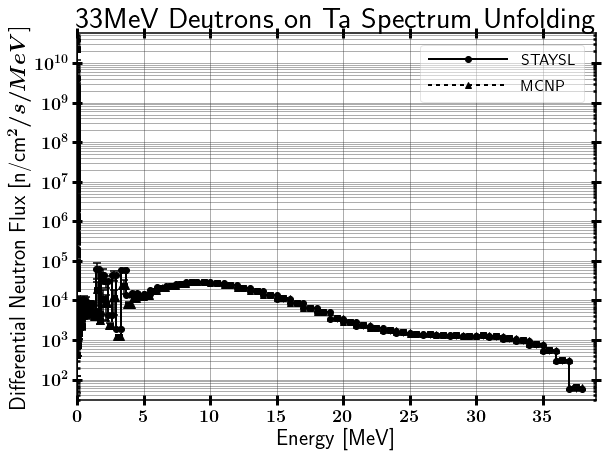

In [5]:
from DataAnalysis.Histograms import Histogram
import matplotlib
%matplotlib inline

outpath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/'

adjDiffHisto = Histogram()
adjDiffHisto.build_histo(df['lowE'].tolist(), df['adjFlux'].tolist(), uncert=df['adjStd'].tolist(),
                     edgeLoc='low', name='STAYSL')

unadjDiffHisto = Histogram()
unadjDiffHisto.build_histo(df['lowE'].tolist(), df['unadjFlux'].tolist(), uncert=df['unadjStd'].tolist(),
                     edgeLoc='low', name='MCNP')

adjDiffHisto.plot(unadjDiffHisto, xMin=1E-6, logX=False, logY=True,
                  title='33MeV Deutrons on Ta Spectrum Unfolding',
                  xLabel='Energy [MeV]', yLabel='Differential Neutron Flux [n/cm^2/s/MeV]',
                  savePath=outpath+'33MeVTa_Staysl-Unfold_Differential')

Convert from differential spectrum and plot.

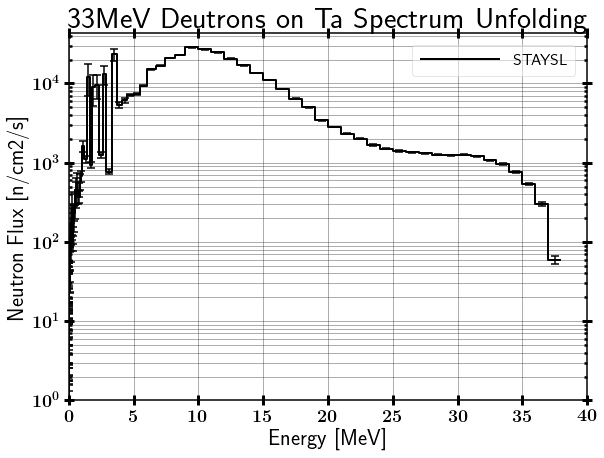

C:\Users\James\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


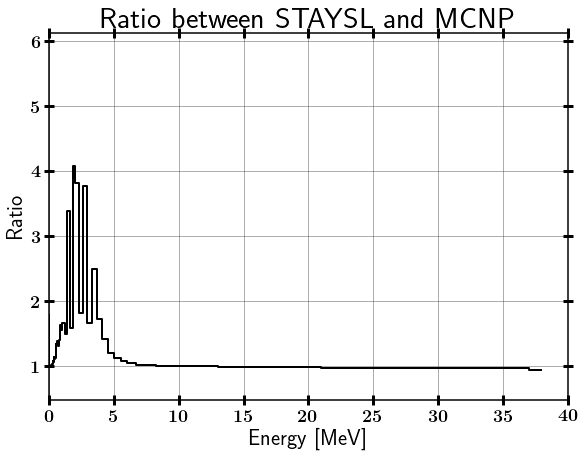

In [6]:
from DataAnalysis.DataManipulation import bin_integration

adjHisto = Histogram()
adjHisto.build_histo(df['lowE'].tolist(),
                     bin_integration(df['lowE'].tolist(), df['adjFlux'].tolist(), 'low'),
                     uncert=bin_integration(df['lowE'].tolist(), df['adjStd'].tolist(), 'low'),
                     edgeLoc='low', name='STAYSL')

unadjHisto = Histogram()
unadjHisto.build_histo(df['lowE'].tolist(),
                       bin_integration(df['lowE'].tolist(), df['unadjFlux'].tolist(), 'low'),
                       uncert=bin_integration(df['lowE'].tolist(), df['unadjStd'].tolist(), 'low'),
                       edgeLoc='low', name='MCNP')

adjHisto.plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
              savePath=outpath+'33MeVTa_Staysl-Unfold')

unadjHisto = Histogram()
normFactor = 4.0600E+9
tallyFrame['normTally'] = tallyFrame['tally'] * normFactor
tallyFrame['normUncertainty'] = tallyFrame['uncertainty'] * tallyFrame['normTally']
unadjHisto.build_histo(tallyFrame['bin'].tolist(), tallyFrame['normTally'].tolist(), 
                       uncert=tallyFrame['normUncertainty'].tolist(), edgeLoc='up', name='MCNP')
#unadjHisto.plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
#              title='33MeV Deutrons on Ta Spectrum Unfolding',
#              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
#              savePath=outpath+'33MeVTa_Staysl-Unfold')

ratioHisto = Histogram()
ratioHisto.build_histo(df['lowE'].tolist(), df['fluxRatio'].tolist(), edgeLoc='low')
ratioHisto.plot(xMin=1E-6, xMax=40, logX=False, logY=False, includeMarkers=False,
              title='Ratio between STAYSL and MCNP',
              xLabel='Energy [MeV]', yLabel='Ratio',
              savePath=outpath+'33MeVTa_Staysl-MCNP-Ratio')

### Iterative Solution number 1:

The iterative solution set the uncertainty below 3 MeV to 100% and did not update the uncertainty unitl $\chi^2$ converged.

In [7]:
from Unfolding.STAYSL import IterativeSTAYSL

stayslPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration1/'
mcnpUncert = IterativeSTAYSL(stayslPath, updateStd=False, chiConv=0.01)
print mcnpUncert

mcnpUncert.run()

IterativeSTYASL:
STAYSL Path: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration1/
$\chi^2$ Convergence: 0.01
Flux Std  Convergence: 0.1
Update Flux Std Each Iteration: False
Number of Energy Groups: 140

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration1/stayslin.out
Chi^2 = 5.60481, Std Norm = 5.39476693472
Chi^2 = 5.59479
Chi^2 = 5.58495
Std Norm = 4.8596138859, 5.396190964
Std Norm = 4.56668313111, 4.8596138859
Std Norm = 4.38139785685, 4.56668313111
Std Norm = 4.24610883162, 4.38139785685
Std Norm = 4.13534782939, 4.24610883162
Std Norm = 4.03707152525, 4.13534782939


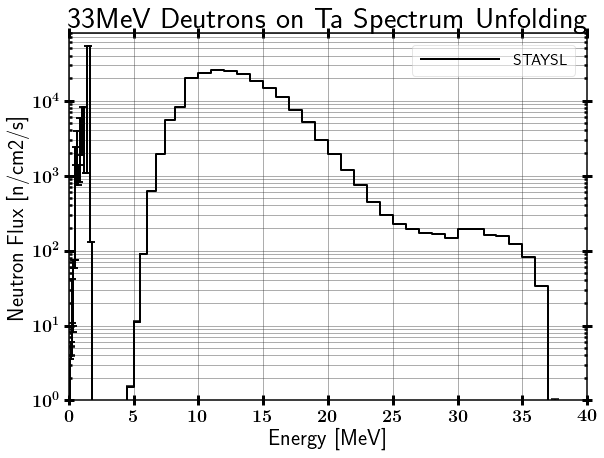

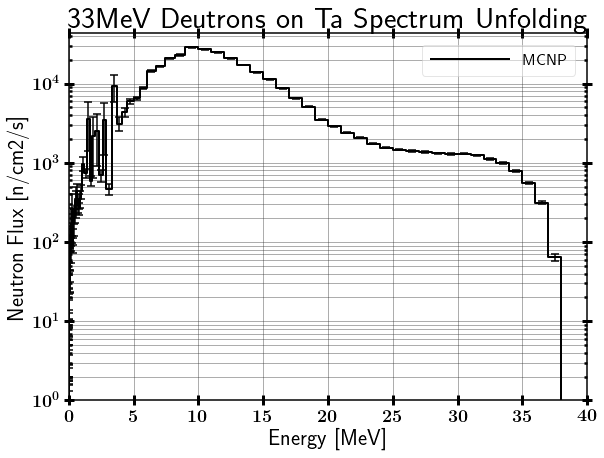

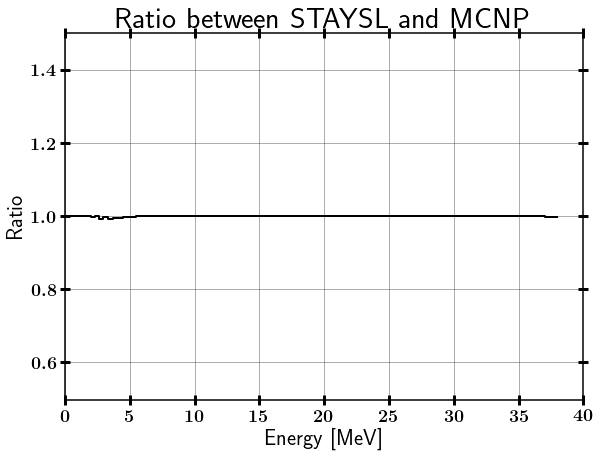

In [8]:
adjHisto1 = Histogram()
adjHisto1.build_histo(mcnpUncert._df['lowE'].tolist(),
                     bin_integration(mcnpUncert._df['lowE'].tolist(), mcnpUncert._df['adjFlux'].tolist(), 'low'),
                     uncert=bin_integration(mcnpUncert._df['lowE'].tolist(), mcnpUncert._df['adjStd'].tolist(), 'low'),
                     edgeLoc='low', name='STAYSL')

unadjHisto1 = Histogram()
unadjHisto1.build_histo(mcnpUncert._df['lowE'].tolist(),
                       bin_integration(mcnpUncert._df['lowE'].tolist(), mcnpUncert._df['unadjFlux'].tolist(), 'low'),
                       uncert=bin_integration(mcnpUncert._df['lowE'].tolist(), mcnpUncert._df['unadjStd'].tolist(), 'low'),
                       edgeLoc='low', name='MCNP')

adjHisto1.plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
              savePath=outpath+'33MeVTa_Staysl-Unfold_Itr1')

unadjHisto1 = Histogram()
tallyFrame['normTally'] = tallyFrame['tally'] * mcnpUncert._normFactor
tallyFrame['normUncertainty'] = tallyFrame['uncertainty'] * tallyFrame['normTally']
unadjHisto1.build_histo(tallyFrame['bin'].tolist(), tallyFrame['normTally'].tolist(), 
                       uncert=tallyFrame['normUncertainty'].tolist(), edgeLoc='up', name='MCNP')
unadjHisto1.plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
              savePath=outpath+'33MeVTa_Staysl-Unfold_Itr1')

ratioHisto1 = Histogram()
ratioHisto1.build_histo(mcnpUncert._df['lowE'].tolist(), mcnpUncert._df['fluxRatio'].tolist(), edgeLoc='low')
ratioHisto1.plot(xMin=1E-6, xMax=40, logX=False, logY=False, includeMarkers=False,
              title='Ratio between STAYSL and MCNP', xLabel='Energy [MeV]', yLabel='Ratio',
              savePath=outpath+'33MeVTa_Staysl-MCNP-Ratio_Itr1')

### Iteration #1

In [ ]:
from GeneralNuclear.MCNP import listToMCNPTable
import numpy as np

listToMCNPTable(np.asarray(adjHisto.sigma)/np.asarray(adjHisto.midPtData), columns=7, leadingStr='')
listToMCNPTable(np.asarray(adjHisto.midPtData)/normFactor, columns=7, leadingStr='')

In [ ]:
path = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration1/stayslin.out'
df1 = pd.read_table(path, engine='python', sep='\s+', skiprows=94, skipfooter=649, header=None,
                   names=['lowE', 'adjFlux', 'unadjFlux', 'fluxRatio', 'adjStd', 
                          'unadjStd', 'uncertRatio', 'integralFlux', 'intFluxUncert'])

df1.apply(pd.to_numeric)
df1['adjStd'] = df1['adjStd'] * df1['adjFlux'] / 100
df1['unadjStd'] = df1['unadjStd'] * df1['unadjFlux'] / 100

print df1.head(5)

adjHisto1 = Histogram()
adjHisto1.build_histo(df1['lowE'].tolist(),
                      bin_integration(df1['lowE'].tolist(), df1['adjFlux'].tolist(), 'low'),
                      uncert=bin_integration(df1['lowE'].tolist(), df1['adjStd'].tolist(), 'low'),
                      edgeLoc='low', name='STAYSL')

ratioHisto1 = Histogram()
ratioHisto1.build_histo(df1['lowE'].tolist(), df1['fluxRatio'].tolist(), edgeLoc='low')
ratioHisto1.plot(xMin=1E-6, xMax=40, logX=False, logY=False, includeMarkers=False,
              title='Ratio between STAYSL and MCNP', xLabel='Energy [MeV]', yLabel='Ratio',
              savePath=outpath+'33MeVTa_Staysl-MCNP-Ratio')

### Iteration #2

In [ ]:
from GeneralNuclear.MCNP import listToMCNPTable
import numpy as np

listToMCNPTable(np.asarray(adjHisto1.sigma)/np.asarray(adjHisto1.midPtData), columns=7, leadingStr='')
listToMCNPTable(np.asarray(adjHisto1.midPtData)/normFactor, columns=7, leadingStr='')

In [ ]:
path = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration2/stayslin.out'
df2 = pd.read_table(path, engine='python', sep='\s+', skiprows=97, skipfooter=649, header=None,
                   names=['lowE', 'adjFlux', 'unadjFlux', 'fluxRatio', 'adjStd', 
                          'unadjStd', 'uncertRatio', 'integralFlux', 'intFluxUncert'])

df2.apply(pd.to_numeric)
df2['adjStd'] = df2['adjStd'] * df2['adjFlux'] / 100
df2['unadjStd'] = df2['unadjStd'] * df2['unadjFlux'] / 100

print df2

adjHisto2 = Histogram()
adjHisto2.build_histo(df2['lowE'].tolist(),
                      bin_integration(df2['lowE'].tolist(), df2['adjFlux'].tolist(), 'low'),
                      uncert=bin_integration(df2['lowE'].tolist(), df2['adjStd'].tolist(), 'low'),
                      edgeLoc='low', name='STAYSL')

ratioHisto2 = Histogram()
ratioHisto2.build_histo(df2['lowE'].tolist(), df2['fluxRatio'].tolist(), edgeLoc='low')
ratioHisto2.plot(xMin=1E-6, xMax=40, logX=False, logY=False, includeMarkers=False,
              title='Ratio between STAYSL and MCNP', xLabel='Energy [MeV]', yLabel='Ratio',
              savePath=outpath+'33MeVTa_Staysl-MCNP-Ratio')

### Iteration #3

In [ ]:
from GeneralNuclear.MCNP import listToMCNPTable
import numpy as np

listToMCNPTable(np.asarray(adjHisto2.sigma)/np.asarray(adjHisto2.midPtData), columns=7, leadingStr='')
listToMCNPTable(np.asarray(adjHisto2.midPtData)/normFactor, columns=7, leadingStr='')

In [ ]:
path = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration3/stayslin.out'
df3 = pd.read_table(path, engine='python', sep='\s+', skiprows=99, skipfooter=649, header=None,
                   names=['lowE', 'adjFlux', 'unadjFlux', 'fluxRatio', 'adjStd', 
                          'unadjStd', 'uncertRatio', 'integralFlux', 'intFluxUncert'])

df3.apply(pd.to_numeric)
df3['adjStd'] = df3['adjStd'] * df3['adjFlux'] / 100
df3['unadjStd'] = df3['unadjStd'] * df3['unadjFlux'] / 100

adjHisto3 = Histogram()
adjHisto3.build_histo(df3['lowE'].tolist(),
                      bin_integration(df3['lowE'].tolist(), df3['adjFlux'].tolist(), 'low'),
                      uncert=bin_integration(df3['lowE'].tolist(), df3['adjStd'].tolist(), 'low'),
                      edgeLoc='low', name='STAYSL')

adjHisto3.plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
              savePath=outpath+'33MeVTa_Staysl-Unfold')

ratioHisto3 = Histogram()
ratioHisto3.build_histo(df3['lowE'].tolist(), df3['fluxRatio'].tolist(), edgeLoc='low')
ratioHisto3.plot(xMin=1E-6, xMax=40, logX=False, logY=False, includeMarkers=False,
              title='Ratio between STAYSL and MCNP', xLabel='Energy [MeV]', yLabel='Ratio',
              savePath=outpath+'33MeVTa_Staysl-MCNP-Ratio')